In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from io import StringIO
%matplotlib inline

In [35]:
data = 'Name,Power,Acceleration,Max speed,Consumption,Transmission,Cost\nMersedes,150,8.1,230,6.65,Auto,208000\nBMW,136,8.9,210,6.3,Mechanic,2060000\nAUDI,190,6.8,250,7.2,Auto,2085000\nWolts,150,7.9,232,7.1,Auto,2097210'
df = pd.read_csv(StringIO(data))
df2 = df[['Power', 'Acceleration', 'Max speed', 'Consumption']]
df

,Name,Power,Acceleration,Max speed,Consumption,Transmission,Cost
0,Mersedes,150,8.1,230,6.65,Auto,208000
1,BMW,136,8.9,210,6.30,Mechanic,2060000
2,AUDI,190,6.8,250,7.20,Auto,2085000
3,Wolts,150,7.9,232,7.10,Auto,2097210


In [36]:
#Нормализация
df_norm = 1+(df2 - df2.mean()) / (df2.max() - df2.min())
df_norm


,Power,Acceleration,Max speed,Consumption
0,0.87963,1.083333,0.9875,0.819444
1,0.62037,1.464286,0.4875,0.430556
2,1.62037,0.464286,1.4875,1.430556
3,0.87963,0.988095,1.0375,1.319444


In [37]:
df_norm['Auto'] =  (df['Transmission'].values == 'Auto')
df_norm

,Power,Acceleration,Max speed,Consumption,Auto
0,0.87963,1.083333,0.9875,0.819444,True
1,0.62037,1.464286,0.4875,0.430556,False
2,1.62037,0.464286,1.4875,1.430556,True
3,0.87963,0.988095,1.0375,1.319444,True


In [38]:
df_norm['Acceleration'] = 2-df_norm['Acceleration']
df_norm['Consumption']  = 2-df_norm['Consumption']
df_norm

,Power,Acceleration,Max speed,Consumption,Auto
0,0.87963,0.916667,0.9875,1.180556,True
1,0.62037,0.535714,0.4875,1.569444,False
2,1.62037,1.535714,1.4875,0.569444,True
3,0.87963,1.011905,1.0375,0.680556,True


In [39]:
model_mother = np.array([1,1,1,4,6])  #Веса: мощность, разгон, макс.скорость - 1, расход - 4, коробка передач - 6
line = np.array(df_norm.loc[0:3])
df['mother_model'] = line.dot(model_mother)

In [40]:
model_racer = np.array([3,7,9,1,9]) #Веса: механическая коробка передач, максимальная скорость - 9, разгон - 7, мощность -3, потребление - 1
df_racer = df_norm
df_racer['Auto'] = ~df_racer['Auto']
line = np.array(df_racer.loc[0:3])
df['racer_model'] = line.dot(model_racer)

In [41]:
model_student = np.array([1,7,5,9,3]) #Веса: Расход - 9, Разгон - 7, Макс скорост -5, коробка передач - 3, мощность - 1
line = np.array(df_norm.loc[0:3])
df['student_model'] = line.dot(model_student)
df

,Name,Power,Acceleration,Max speed,Consumption,Transmission,Cost,mother_model,racer_model,student_model
0,Mersedes,150,8.1,230,6.65,Auto,208000,13.506,19.1236,22.8588
1,BMW,136,8.9,210,6.30,Mechanic,2060000,7.92136,20.5681,23.9329
2,AUDI,190,6.8,250,7.20,Auto,2085000,12.9214,29.5681,24.9329
3,Wolts,150,7.9,232,7.10,Auto,2097210,11.6513,19.7403,19.2755


Text(0.5, 1.0, 'mother_model')

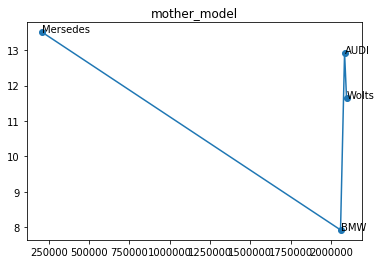

In [60]:
plt.plot(dft['Cost'], dft['mother_model'], marker='o')
ax = plt.gca()
for i in range(0,4):
    ax.text(dft.loc[i,'Cost'], dft.loc[i,'mother_model'], dft.loc[i,'Name'])
plt.title ('mother_model')

Text(0.5, 1.0, 'racer_model')

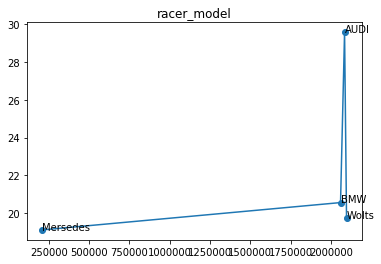

In [58]:
plt.plot(dft['Cost'], dft['racer_model'], marker='o')
ax = plt.gca()
for i in range(0,4):
    ax.text(dft.loc[i,'Cost'], dft.loc[i,'racer_model'], dft.loc[i,'Name'])
plt.title ('racer_model')

Text(0.5, 1.0, 'student_model')

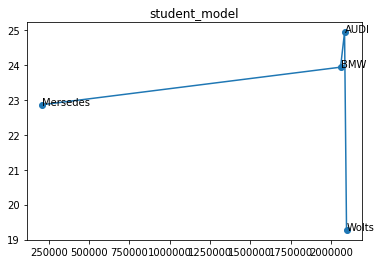

In [61]:
plt.plot(dft['Cost'], dft['student_model'], marker='o')
ax = plt.gca()
for i in range(0,4):
    ax.text(dft.loc[i,'Cost'], dft.loc[i,'student_model'], dft.loc[i,'Name'])
plt.title ('student_model')